## Lesson 3: Filters and Plots

https://www.coursera.org/learn/data-analysis-r/quiz/8Myvu/hands-on-activity-filters-and-plots/attempt

--

## Background for this activity
In this activity, you'll review a scenario, and practice creating a data visualization with ggplot2. You will learn how to make use of the filters and facets features of ggplot2 to create custom visualizations based on different criteria. 

Throughout this activity, you will also have the opportunity to practice writing your own code by making changes to the code chunks yourself. If you encounter an error or get stuck, you can always check the Lesson3_Filters_Solutions .rmd file in the Solutions folder under Week 4 for the complete, correct code. 

## The Scenario

As a junior data analyst for a hotel booking company, you have been asked to clean hotel booking data, create visualizations with `ggplot2` to gain insight into the data, and present different facets of the data through visualization. Now, you are going to build on the work you performed previously to apply filters to your data visualizations in `ggplot2`.  

## Step 1: Import your data

If you haven't exited out of RStudio since importing this data last time, you can skip these steps. Rerunning these code chunks won't affect your console if you want to run them just in case, though.  

If this line causes an error, copy in the line setwd("projects/Course 7/Week 4") before it.

Run the code below to read in the file 'hotel_bookings.csv' into a data frame: 

```{r load data}
hotel_bookings <- read.csv("hotel_bookings.csv")
```

In [1]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('hotel_bookings.csv')

## Step 2: Refresh Your Memory

By now, you are pretty familiar with this data set. But you can refresh your memory with the `head()` and `colnames()` functions. Run two code chunks below to get at a sample of the data and also preview all the column names:

```{r look at data}
head(hotel_bookings)
```

```{r look at column names}
colnames(hotel_bookings)
```


In [3]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Step 3: Install and load the 'ggplot2' package (optional)

If you haven't already installed and loaded the `ggplot2` package, you will need to do that before you can use the `ggplot()` function. You only have to do this once though, not every time you call `ggplot()`.

You can also skip this step if you haven't closed your RStudio account since doing the last activity. If you aren't sure, you can run the code chunk and hit 'cancel' if the warning message pops up telling you that have already downloaded the `ggplot2` package.

Run the code chunk below to install and load `ggplot2`. This may take a few minutes!

```{r loading and installing ggplot2, echo=FALSE, message=FALSE}
install.packages('ggplot2')
library(ggplot2)
```

In [7]:
import seaborn as sns

## Step 4: Making many different charts

Earlier, you created a scatterplot to explore the relationship between booking lead time and guests traveling with children. As a refresher, here's the code:

```{r scatterplot}
ggplot(data = hotel_bookings) +
  geom_point(mapping = aes(x = lead_time, y = children))
```


<AxesSubplot:xlabel='lead_time', ylabel='children'>

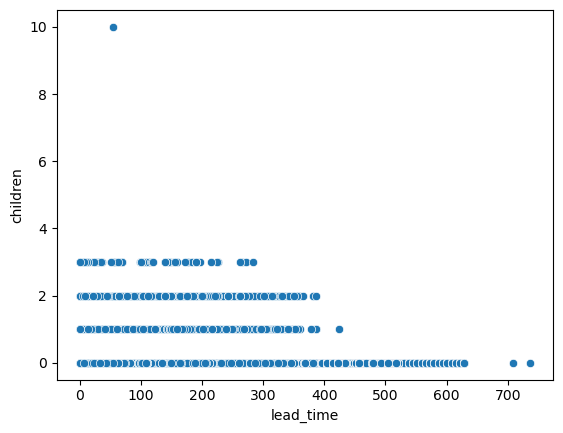

In [8]:
sns.scatterplot(data=hotel_bookings, x="lead_time", y="children")

Your stakeholder asked about the group of guests who typically make early bookings, and this plot showed that many of these guests do not have children. 

Now, your stakeholder wants to run a family-friendly promotion targeting key market segments. She wants to know which market segments generate the largest number of bookings, and where these bookings are made (city hotels or resort hotels). 

First, you decide to create a bar chart showing each hotel type and market segment. You use different colors to represent each market segment: 

```{r bar chart}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = hotel, fill = market_segment))
```

<AxesSubplot:xlabel='hotel', ylabel='count'>

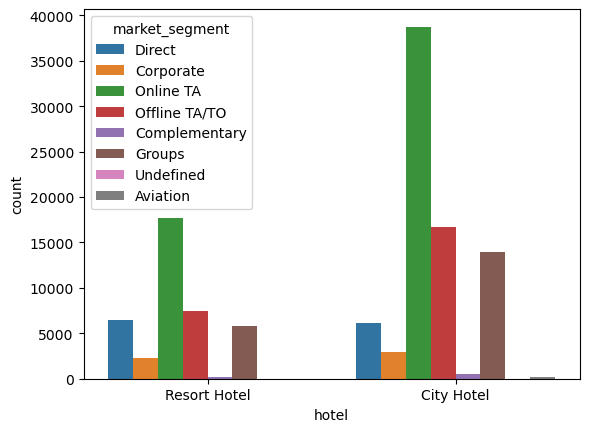

In [9]:
sns.countplot(data=hotel_bookings, x="hotel", hue="market_segment")

The geom_bar() function uses bars to create a bar chart. The chart has 'hotel' on the x-axis and 'count' on the y-axis (note: if you don't specify a variable for the y-axis, the code defaults to 'count'). The code maps the 'fill' aesthetic to the variable 'market_segment' to generate color-coded sections inside each bar.  

After creating this bar chart, you realize that it's difficult to compare the size of the market segments at the top of the bars. You want your stakeholder to be able to clearly compare each segment.   

You decide to use the facet_wrap() function to create a separate plot for each market segment. In the parentheses of the facet_wrap() function, add the variable 'market_segment' after the tilde symbol (~):

```{r faceting a plot}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = hotel)) +
  facet_wrap(~market_segment)
```

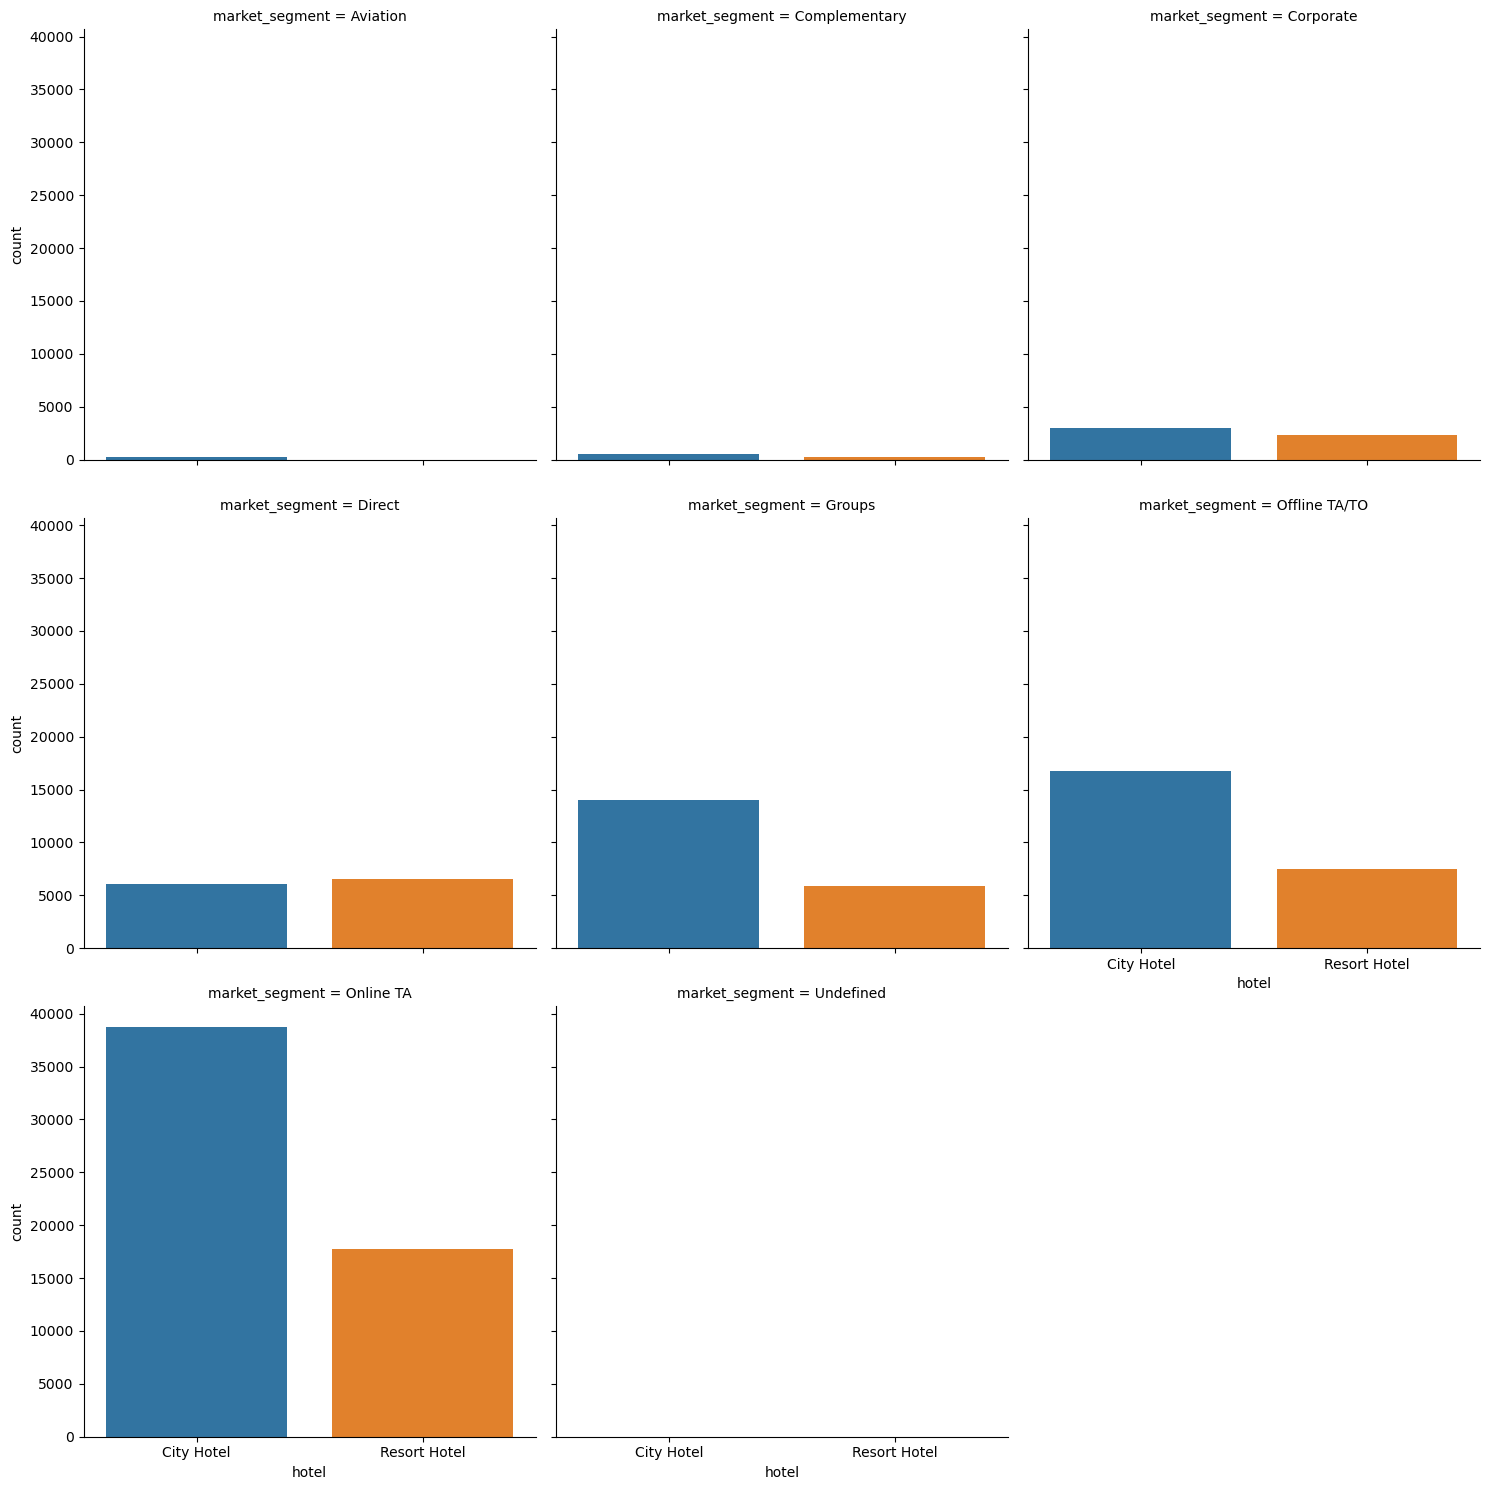

In [11]:
hotels_grouped = hotel_bookings.groupby(['hotel', 'market_segment']).size().reset_index(name='count')

sns.catplot(data=hotels_grouped, x="hotel", y="count", kind="bar", col="market_segment", col_wrap=3)

Now you have a separate bar chart for each market segment. Your stakeholder has a clearer idea of the size of each market segment, as well as the corresponding data for each hotel type.

## Step 5: Filtering

For the next step, you will need to have the `tidyverse` package installed and loaded. You may see a pop-up asking if you want to install; if that's the case, click 'Install.' This may take a few minutes!

If you have already done this because you're using the `tidyverse` package on your own, you can skip this code chunk.

```{r install and download tidyverse}
install.packages('tidyverse')
library(tidyverse)
```

After considering all the data, your stakeholder decides to send the promotion to families that make online bookings for city hotels. The online segment is the fastest growing segment, and families tend to spend more at city hotels than other types of guests. 

Your stakeholder asks if you can create a plot that shows the relationship between **lead time** and guests traveling with **children** for **online bookings** at city hotels. This will give her a better idea of the specific timing for the promotion. 

You think about it, and realize you have all the tools you need to fulfill the request. You break it down into the following two steps:

1) filtering your data; 
2) plotting your filtered data. 

For the first step, you can use the `filter()` function to create a data set that only includes the data you want. Input 'City Hotel' in the first set of quotation marks and 'Online TA' in the second set of quotations marks to specify your criteria: 

```{r filtering a dataset to just city hotels that are online TA}
onlineta_city_hotels <- filter(hotel_bookings, 
                           (hotel=="City Hotel" & 
                             hotel_bookings$market_segment=="Online"))
```

Note that you can use the '&' character to demonstrate that you want two different conditions to be true. Also, you can use the '$' character to specify which column in the data frame 'hotel_bookings' you are referencing (for example, 'market_segment'). 

You can use the`View`() function to check out your new data frame:

```{r View}
View(onlineta_city_hotels)
```

In [15]:
onlineta_city_hotels = hotel_bookings[(hotel_bookings['hotel'] == 'City Hotel') & 
                                           # (hotel_bookings['hotel_bookings'] == 'Online TA') &
                                            (hotel_bookings['market_segment'] == 'Online TA')]

onlineta_city_hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02
40065,City Hotel,1,79,2015,July,27,2,0,3,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-06-25


There is also another way to do this. You can use the pipe operator (%>%) to do this in steps! 

You name this data frame `onlineta_city_hotels_v2`:

```{r filtering a dataset with the pipe}
onlineta_city_hotels_v2 <- hotel_bookings %>%
  filter(hotel=="City Hotel") %>%
  filter(market_segment=="Online TA")
```

Notice how in the code chunk above, the %>% symbol is used to note the logical steps of this code. First, it starts with the name of the data frame, `onlineta_city_hotels_v2`, AND THEN it tells `R` to start with the original data frame `hotel_bookings`. Then it tells it to filter on the 'hotel' column; finally, it tells it to filter on the 'market_segment' column.

This code chunk generates the same data frame by using the `View()` function:

```{r view second dataframe}
View(onlineta_city_hotels_v2)
```

## Step 6: Use your new dataframe

You can use either of the data frames you created above for your new plots because they are the same. 

Using the code for your previous scatterplot, replace `variable_name` in the code chunk below with either `onlineta_city_hotels` or `onlineta_city_hotels_v2` to plot the data your stakeholder requested:

```{r creating a plot part two}
ggplot(data = variable_name) +
  geom_point(mapping = aes(x = lead_time, y = children))
```

<AxesSubplot:xlabel='lead_time', ylabel='children'>

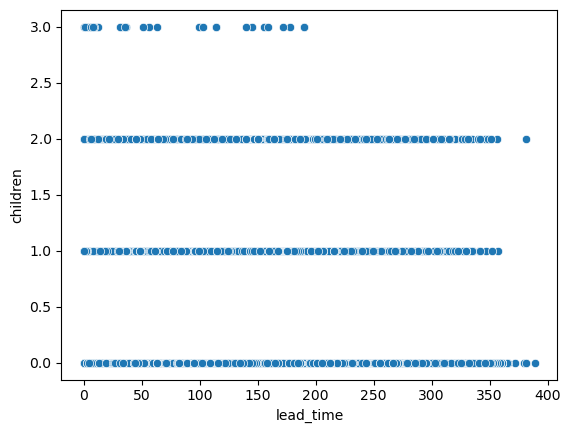

In [16]:
sns.scatterplot(data=onlineta_city_hotels, x="lead_time", y="children")

Based on your previous filter, this scatterplot shows data for online bookings for city hotels. The plot reveals that bookings with children tend to have a shorter lead time, and bookings with 3 children have a significantly shorter lead time (<200 days). So, promotions targeting families can be made closer to the valid booking dates.  

## Activity Wrap Up

Filters allow you to create different views of your data and allow you to investigate more specific relationships within your data. You can practice these skills by modifying the code chunks in the rmd file, or use this code as a starting point in your own project console. Now that your stakeholder has had a chance to review these plots, they are interested in adding annotations they can use to explain the data in a presentation. Luckily, `ggplot2` has a function that will allow you to do just that. You will learn more about `ggplot2` in the next activity! 